In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from parse_dataset import parse_data
%matplotlib inline

os.chdir("/Users/enrico.t/code/ml-reference-implementations")
df = parse_data('data/babI/tasks_1-20_v1-2/en/qa1_single-supporting-fact_train.txt')

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words=['is', 'the', 'to', 'where'])
corpus = df['fact1'].tolist() + df['fact2'].tolist() + df['question'].tolist() + df['answer'].tolist()
vectorizer.fit(corpus)

y_train = df['answer']
X_train = pd.concat([
        pd.DataFrame(vectorizer.transform(df['fact1']).todense(), columns=vectorizer.get_feature_names()), 
        pd.DataFrame(vectorizer.transform(df['fact2']).todense(), columns=vectorizer.get_feature_names()), 
        pd.DataFrame(vectorizer.transform(df['question']).todense(), columns=vectorizer.get_feature_names())
    ], 
    axis=1)

df_test = parse_data('data/babI/tasks_1-20_v1-2/en/qa1_single-supporting-fact_test.txt')

y_test = df_test['answer']
X_test = pd.concat([
        pd.DataFrame(vectorizer.transform(df_test['fact1']).todense(), columns=vectorizer.get_feature_names()), 
        pd.DataFrame(vectorizer.transform(df_test['fact2']).todense(), columns=vectorizer.get_feature_names()), 
        pd.DataFrame(vectorizer.transform(df_test['question']).todense(), columns=vectorizer.get_feature_names())
    ], 
    axis=1)

In [4]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

parameter_grid = {}

gs = GridSearchCV(
    AdaBoostClassifier(random_state=42),
    param_grid=parameter_grid,
    cv=5
)

gs.fit(X_train, y_train)
gs.get_params()

{'cv': 5,
 'error_score': 'raise-deprecating',
 'estimator': AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
           learning_rate=1.0, n_estimators=50, random_state=42),
 'estimator__algorithm': 'SAMME.R',
 'estimator__base_estimator': None,
 'estimator__learning_rate': 1.0,
 'estimator__n_estimators': 50,
 'estimator__random_state': 42,
 'fit_params': None,
 'iid': 'warn',
 'n_jobs': None,
 'param_grid': {},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': 'warn',
 'scoring': None,
 'verbose': 0}

In [5]:
from pandas_ml import ConfusionMatrix

print gs.score(X=X_test, y=y_test)

y_predict = gs.predict(X_test)

0.463


In [6]:
cm = ConfusionMatrix(y_test, y_predict)
cm.print_stats()

/Users/enrico.t/code/ml-reference-implementations/venv/lib/python2.7/site-packages/pandas_ml/confusion_matrix/stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2


Confusion Matrix:

Predicted  bathroom  bedroom  garden  hallway  kitchen  office  __all__
Actual                                                                 
bathroom         80       16      16       16       13       8      149
bedroom          23       79       9       11       23      26      171
garden           20       31      76       15       21      24      187
hallway          13       19      10       73       14      25      154
kitchen          24       11      15       18       76      13      157
office           31       14      17       24       17      79      182
__all__         191      170     143      157      164     175     1000


Overall Statistics:

Accuracy: 0.463
95% CI: (0.43174313655264296, 0.49447528364059845)
No Information Rate: ToDo
P-Value [Acc > NIR]: 1.1695024266398575e-84
Kappa: 0.3560795919199381
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                 bathroom   bedroom     garden  \
Population              

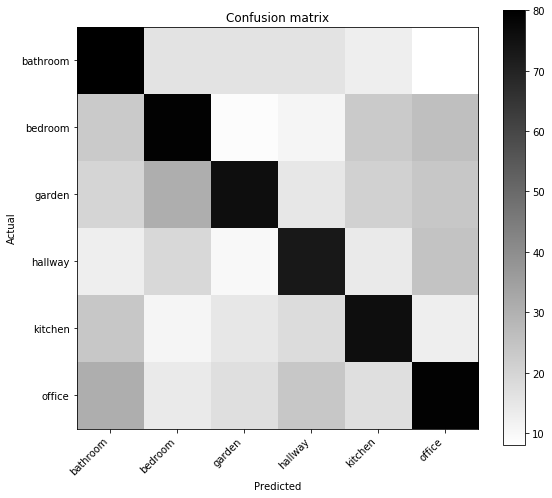

In [7]:
cm.plot()